# 레일리 분포 함수의 사용 예

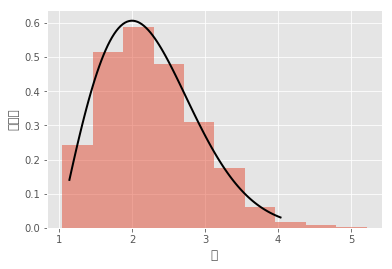

In [10]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')


# 1. 통계 분포 함수 설정(이후 고정)
rv = sp.stats.rayleigh(loc=1)

# 2. 위의 통계 분포 함수로 확률 변수 생성
r = rv.rvs(size=3000)

# 3. 확률밀도 함수를 그리기 위한 100개의 데이터 점
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

# 원래의 확률밀도 함수와 함께 샘플링한 데이터의 분포를 그리기
plt.figure(1)
plt.clf()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='확률밀도함수')
plt.hist(r, normed=True, histtype='barstacked', alpha=0.5)
plt.xlabel('값')
plt.ylabel('분포도')
plt.show()

## 이산 푸리에 분석
### 리스트 8.2 fft를 이용한 주파수 분석 예

In [4]:
# 1. scipy 와는 별도로 임포트 해야 함
from scipy.fftpack import fft

# 2. 30 Hz 신호와 잡음을 합성한 신호 y를 생성
Fs = 500  # 샘플링 주파수
T = 1/Fs  # 샘플링 간격
L = 2**14  # 신호의 길이(샘플링 수)
t = sp.arange(L)*T  # 시간 벡터
y = np.sin(2*np.pi*30*t) + 5*sp.randn(t.size)  # 신호 생성

# 3. FFT 수행
Y = sp.fftpack.fft(y, L)/L
f = (Fs/L)*sp.arange(L/2 + 1)  # 주파수 벡터를 구함

# 4. 원래의 시계열 데이터와 FFT로 주파수 분석을 거친 결과를 그래프로 그리기
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('시간 [s]')
plt.ylabel('값')
plt.subplot(2, 1, 2)
plt.plot(f, 2*abs(Y[:L/2 + 1]))
plt.xlabel('주파수 [Hz]')
plt.ylabel('|Y(f)|')

TypeError: slice indices must be integers or None or have an __index__ method

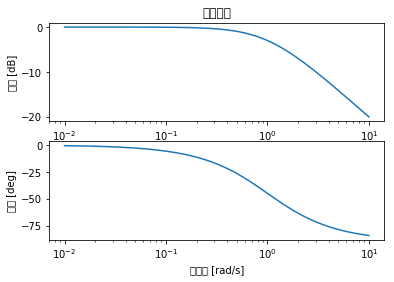

In [8]:
# 1. scipy 와 별도로 임포트 해야 한다.
from scipy import signal

# 2. 선형 시스템을 정의
s1 = sp.signal.lti([1], [1, 1])

# 3. bode 함수를 이용한 분석
w, mag, phase = sp.signal.bode(s1)

# 4. 보드 플롯 그리기
plt.figure(1)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)  # Bode magnitude plot
plt.box('on')
plt.xlabel('주파수 [rad/s]')
plt.ylabel('게인 [dB]')
plt.title('보드플롯')
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)  # Bode phase plot
plt.xlabel('주파수 [rad/s]')
plt.ylabel('위상 [deg]')
plt.box('on')
plt.show()